In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import fftpack
from scipy import signal
import numpy as np
import pandas as pd
import datetime
import prettyplotlib as ppl

In [11]:
cd ~/Documents/01_SensorData/2016_04_12/cleaning-addingLABEL/

/home/takeyama/Documents/01_SensorData/2016_04_12/cleaning-addingLABEL


In [22]:
left_hand = pd.read_csv('Cleaning-Conv-left-hand-ags.csv',parse_dates=['Time'])
#left_hand.Time=pd.to_timedelta(left_hand.Time)
left_leg = pd.read_csv('Cleaning-Conv-left-leg-ags.csv',parse_dates=['Time'])
#left_leg.Time=pd.to_timedelta(left_leg.Time)
right_hand = pd.read_csv('Cleaning-Conv-right-hand-ags.csv',parse_dates=['Time'])
#right_hand.Time=pd.to_timedelta(right_hand.Time)
right_leg = pd.read_csv('Cleaning-Conv-right-leg-ags.csv',parse_dates=['Time'])
#right_leg.Time=pd.to_timedelta(right_leg.Time)
west = pd.read_csv('Cleaning-Conv-west-ags.csv',parse_dates=['Time'])
#west.Time=pd.to_timedelta(west.Time)

In [52]:
left_hand

,Type,Time,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,label
0,ags,2016-04-21 18:06:15.696,0.8226,0.7922,-0.0543,6.162932,1.255939,-0.166330,walking
1,ags,2016-04-21 18:06:15.706,0.8058,0.8437,-0.0582,6.307794,1.042660,-0.396190,walking
2,ags,2016-04-21 18:06:15.716,0.8292,0.9091,-0.0231,6.177593,0.838282,-0.593761,walking
3,ags,2016-04-21 18:06:15.726,0.7628,1.1183,-0.0436,5.675462,0.621337,-0.821352,walking
4,ags,2016-04-21 18:06:15.736,0.7811,1.3112,-0.0370,4.791103,0.325155,-0.960629,walking
5,ags,2016-04-21 18:06:15.746,0.7496,1.3971,-0.0375,3.644247,-0.014835,-1.057670,walking
6,ags,2016-04-21 18:06:15.756,0.7459,1.3967,-0.0302,2.480986,-0.370184,-1.121374,walking
7,ags,2016-04-21 18:06:15.766,0.7171,1.3822,-0.0204,1.350536,-0.683820,-1.206546,walking
8,ags,2016-04-21 18:06:15.776,0.7054,1.3510,-0.0226,0.301069,-1.008102,-1.303586,walking
9,ags,2016-04-21 18:06:15.786,0.7008,1.3061,-0.0141,-0.625002,-1.310568,-1.404816,walking


In [26]:
right_hand

,Type,Time,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,label
0,ags,2016-04-21 18:06:15.656,0.8258,-0.3066,0.1603,-2.761460,-0.321664,-1.531177,walking
1,ags,2016-04-21 18:06:15.666,0.8805,-0.2997,0.1664,-2.654646,-0.416959,-1.561022,walking
2,ags,2016-04-21 18:06:15.676,0.9398,-0.2975,0.1911,-2.555511,-0.501957,-1.615128,walking
3,ags,2016-04-21 18:06:15.686,0.9852,-0.2992,0.2060,-2.446777,-0.578751,-1.660332,walking
4,ags,2016-04-21 18:06:15.696,1.0253,-0.2980,0.2035,-2.337519,-0.657116,-1.709375,walking
5,ags,2016-04-21 18:06:15.706,1.0421,-0.2812,0.2114,-2.238734,-0.722043,-1.749169,walking
6,ags,2016-04-21 18:06:15.716,1.0529,-0.2724,0.2045,-2.151991,-0.788714,-1.783552,walking
7,ags,2016-04-21 18:06:15.726,1.0570,-0.2602,0.1862,-2.084098,-0.859400,-1.806765,walking
8,ags,2016-04-21 18:06:15.736,1.0770,-0.2482,0.1850,-2.014808,-0.935846,-1.811477,walking
9,ags,2016-04-21 18:06:15.746,1.1058,-0.2470,0.1840,-1.941330,-1.004612,-1.802227,walking


In [51]:
fft_left_hand=pd.DataFrame({
        "Time":left_hand.Time,
        "AccX":fftpack.fft(left_hand.AccX),
        "AccY":fftpack.fft(left_hand.AccY),
        "AccZ":fftpack.fft(left_hand.AccZ),
        "GyrX":fftpack.fft(left_hand.GyrX),
        "GyrY":fftpack.fft(left_hand.GyrY),
        "GyrZ":fftpack.fft(left_hand.GyrZ),
        "label":left_hand.label
    })

In [53]:
fft_right_hand=pd.DataFrame({
        "Time":right_hand.Time,
        "AccX":fftpack.fft(right_hand.AccX),
        "AccY":fftpack.fft(right_hand.AccY),
        "AccZ":fftpack.fft(right_hand.AccZ),
        "GyrX":fftpack.fft(right_hand.GyrX),
        "GyrY":fftpack.fft(right_hand.GyrY),
        "GyrZ":fftpack.fft(right_hand.GyrZ),
        "label":right_hand.label
    })

In [54]:
fft_left_hand.dtypes

AccX         complex128
AccY         complex128
AccZ         complex128
GyrX         complex128
GyrY         complex128
GyrZ         complex128
Time     datetime64[ns]
label            object
dtype: object

In [55]:
fft_right_hand.dtypes

AccX         complex128
AccY         complex128
AccZ         complex128
GyrX         complex128
GyrY         complex128
GyrZ         complex128
Time     datetime64[ns]
label            object
dtype: object

In [56]:
fft_left_hand

,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,Time,label
0,(39686.0189+0j),(26227.5996+0j),(1058.1418+0j),(-1771.10043466+0j),(-1661.40177879+0j),(187.284126183+0j),2016-04-21 18:06:15.696,walking
1,(-6195.56747794+4295.81877706j),(3899.44645276-1293.73120816j),(-855.583788627+2556.17045519j),(95.832008359-1821.9946305j),(352.999249993-478.828853662j),(-140.801580154+567.60893153j),2016-04-21 18:06:15.706,walking
2,(-766.146366531-1692.74510287j),(-1590.88494822-1267.26071263j),(5142.3902188-1828.05861113j),(1806.55119877+403.569230513j),(-742.275587592-865.742692948j),(-426.458317988-765.213208845j),2016-04-21 18:06:15.716,walking
3,(854.111853738-5153.44608764j),(910.950488096+4554.2849502j),(-3074.19296423-4403.4597339j),(324.450241243-51.3071625968j),(-570.058640302-297.511914558j),(534.48359024+615.511452366j),2016-04-21 18:06:15.726,walking
4,(-847.347810848+1979.57175796j),(553.72907432-28.8371611058j),(-678.747990254-907.586427411j),(277.063928174+1422.7103374j),(455.28884638+315.302623835j),(-272.920937986+1083.18076012j),2016-04-21 18:06:15.736,walking
5,(2980.25815864+522.353515779j),(-1805.40207465-1391.87501021j),(-91.0384006409+2817.38680601j),(-2161.13607152-375.199757932j),(-2334.45510699-511.783668713j),(-1312.27079294-108.856001948j),2016-04-21 18:06:15.746,walking
6,(2625.35788368-1231.35540911j),(-191.040282833+159.057694598j),(285.894056918+1292.97739096j),(-813.900715863-1370.032319j),(635.55329603-195.417236188j),(445.535846472+236.151166318j),2016-04-21 18:06:15.756,walking
7,(-1528.47513821+50.2324262889j),(-97.2712675648-480.329989114j),(-645.111096839+2257.71628702j),(1376.03327369+1719.09655979j),(1661.13982159+901.736389507j),(767.426984406+585.302925559j),2016-04-21 18:06:15.766,walking
8,(-3438.01820531-3417.22546334j),(-171.295170673+565.909485692j),(1444.06166781+2868.67701548j),(45.1397158418+1317.65862782j),(16.8042238091+277.217182139j),(185.282600374-749.798259915j),2016-04-21 18:06:15.776,walking
9,(-4163.04928645-4083.50128558j),(3188.43487172+1884.35890923j),(-761.905654506-556.725441745j),(61.0142402646+686.928765908j),(813.898840676-240.697560437j),(912.427195991-1170.17027096j),2016-04-21 18:06:15.786,walking


In [57]:
fft_right_hand

,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,Time,label
0,(39334.9577+0j),(-24436.3362+0j),(5686.713+0j),(-2053.16152428+0j),(-977.462571868+0j),(195.672702166+0j),2016-04-21 18:06:15.656,walking
1,(-8102.18464115+2548.47399324j),(-4156.13063173+1674.27196566j),(4293.84853547+1898.65477677j),(-1719.69944828-1000.68315792j),(-149.28827799+367.073179593j),(-224.28466208-240.774519466j),2016-04-21 18:06:15.666,walking
2,(-1507.51996016-3299.8495903j),(1274.49434114-725.775782027j),(2497.96935719-617.576723678j),(1900.68020989-655.314588087j),(-105.609831754-367.261492146j),(492.75168947+282.719435355j),2016-04-21 18:06:15.676,walking
3,(1015.21869681-4947.27832359j),(-34.9255678002-7136.65192537j),(358.616435289-1851.16617839j),(961.796837713-644.750413613j),(401.074352166-333.088800372j),(-380.382795989+348.675427134j),2016-04-21 18:06:15.686,walking
4,(218.307436602+1080.25468495j),(-2291.16478444-582.228477873j),(-2911.28078839-650.565107716j),(251.881966044+1080.06078654j),(721.404153034-28.4364857073j),(227.697697775+757.810385739j),2016-04-21 18:06:15.696,walking
5,(1808.81415396-1181.68197105j),(2839.99914024+1592.18959027j),(1459.39477883+1472.54243078j),(-1438.39785465-1117.01178619j),(794.68092098+286.939228135j),(-1003.85840047-330.049665356j),2016-04-21 18:06:15.706,walking
6,(2736.171069-3826.83425502j),(-10.5724602785-1068.78587023j),(-1857.23096111+2381.24772252j),(-325.916335468-1501.51717153j),(457.756436015-340.757377654j),(285.036318065-454.779939763j),2016-04-21 18:06:15.716,walking
7,(97.9764418965-2552.99721007j),(461.127520702+233.112229622j),(1133.98368685+2163.41458933j),(722.96197675+601.428909683j),(-126.510796694-135.899614122j),(-168.622557574+490.741458196j),2016-04-21 18:06:15.726,walking
8,(-596.030071634-4403.0328853j),(918.126707697-484.902941519j),(921.893095518+2772.80722401j),(283.294927653+1477.02202547j),(509.444870329-417.259699466j),(-32.5119602186+106.824671057j),2016-04-21 18:06:15.736,walking
9,(-1572.46194599-2955.7024071j),(-1215.01957431-1713.74974946j),(1200.90119025+422.48131933j),(-312.354187475+227.362059992j),(159.522771045+270.615511085j),(-653.022776074+261.738733483j),2016-04-21 18:06:15.746,walking


In [58]:
PowerAccX=np.real(fft_left_hand.AccX)**2+np.imag(fft_left_hand.AccX)**2

In [59]:
PowerAccX

array([  1.57498010e+09,   5.68391153e+07,   3.45236624e+06, ...,
         2.72875136e+07,   3.45236624e+06,   5.68391153e+07])

In [60]:
_PowerAccx=PowerAccX

In [61]:
PowerAccX=PowerAccX[0:16*1024]

In [62]:
PowerAccX.shape

(16384,)

In [63]:
PowerAccX=PowerAccX.reshape(1024,16)

In [64]:
PowerAccX.shape

(1024, 16)

In [70]:
PowerAccX=PowerAccX*255/PowerAccX.max()

In [71]:
PowerAX=np.array(PowerAccX,dtype = np.int32)

In [72]:
PowerAX.reshape(16,1024)

array([[255,   9,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ..., 
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int32)

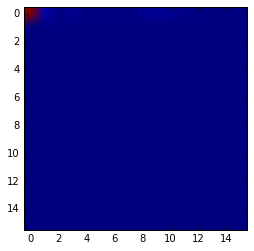

In [73]:
plt.imshow(PowerAX[:16])

In [69]:
from scikits.statsmodels.tsa import stattools

In [ ]:
ccf = stattools.ccf(left_hand.AccX[:1024], right_hand.AccX[:1024])

In [ ]:
plt.plot(ccf)

In [ ]:
np.argmax(ccf[:50])

In [ ]:
ccf[0]

In [ ]:
plt.plot(ccf[:20])

In [ ]:
left_hand

In [ ]:
plt.plot(left_hand.AccX[:64])

In [ ]:
plt.plot(right_hand.AccX[:64])

In [ ]:
plt.plot(right_hand.AccX[1000:1256])

In [ ]:
plt.plot(left_leg.AccX[1000:1256])

In [ ]:
plt.plot(right_leg.AccX[1000:1256])

In [ ]:
ccf = stattools.ccf(left_leg.AccX[:1024], right_leg.AccX[:1024])

In [ ]:
plt.plot(ccf)

In [ ]:
np.argmax(ccf)

In [ ]:
plt.plot(right_hand.AccX)

In [ ]:
plt.plot(left_hand.AccX)

In [ ]:
right_hand.AccX.max()

In [ ]:
left_hand.AccX.max()